# Analysis of the PyDataStructs string matching API


## Dataset

We have used the [Urban Dictionary Words and Definitions](www.kaggle.com/datasets/therohk/urban-dictionary-words-dataset) from [Urban Dictionary](https://www.urbandictionary.com/). The intent of this demo is to show how the different **pydatastructs** string matching API can be used and their performances.

The Urban Dictionary Words and Definitions dataset contains a collection of crowdsourced slang terms and their meanings from Urban Dictionary, a popular user-driven dictionary for contemporary language and internet jargon. This dataset includes word entries, corresponding definitions, upvote/downvote counts, and other metadata, making it valuable for natural language processing (NLP) tasks, sentiment analysis, and linguistic research. Due to its informal nature, the dataset captures evolving slang, cultural references, and colloquial expressions, providing insights into modern language trends.


In [ ]:
# Import API for string searching
from pydatastructs import find

# Import util modules
import time
import pandas as pd
from pandas.core.frame import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load dataset
df: DataFrame = pd.read_csv("urbandict-word-defs.csv")

C:\Users\fam\AppData\Local\Temp\ipykernel_23428\982205164.py:2: DtypeWarning: Columns (3,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df: DataFrame = pd.read_csv("urbandict-word-defs.csv")


In [7]:
# Display some info about dataset
print("Dataset Shape:")
print(df.shape)
print("Dataset Columns:")
print(df.columns)
print("Dataset Info:")
print(df.info())
print("Dataset Description:")
print(df.describe())
print("Dataset Sample:")
display(df.head())

Dataset Shape:
(1048525, 12)
Dataset Columns:
Index(['word_id', 'word', 'up_votes', 'down_votes', 'author', 'definition',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048525 entries, 0 to 1048524
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   word_id      1048525 non-null  int64 
 1   word         1048500 non-null  object
 2   up_votes     1048497 non-null  object
 3   down_votes   1048521 non-null  object
 4   author       1048524 non-null  object
 5   definition   1048362 non-null  object
 6   Unnamed: 6   153 non-null      object
 7   Unnamed: 7   34 non-null       object
 8   Unnamed: 8   6 non-null        object
 9   Unnamed: 9   2 non-null        object
 10  Unnamed: 10  1 non-null        object
 11  Unnamed: 11  1 non-null        object
dtypes: int64(1), object(1

,word_id,word,up_votes,down_votes,author,definition,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,7,Janky,296,255,dc397b2f,Undesirable; less-than optimum.,NaN,NaN,NaN,NaN,NaN,NaN
1,8,slumpin',16,37,dc397b2f,"low down and funky, but [knee deep] enough to ...",NaN,NaN,NaN,NaN,NaN,NaN
2,9,yayeeyay,19,27,dc397b2f,"affirmation; suggestion of encouragement, appr...",NaN,NaN,NaN,NaN,NaN,NaN
3,12,hard-core,162,96,d1610749,anything out of our league that can be good or...,NaN,NaN,NaN,NaN,NaN,NaN
4,13,brutal,12,45,40ece1ef,anything that makes you sweat,NaN,NaN,NaN,NaN,NaN,NaN


## Search Methodologies

We employ four different search techniques to analyze word queries within the dataset. They all use the pydatastructs backend and API.
The four algorithms are as follows:

1. Knuth-Morris-Pratt
2. Rabin–Karp
3. Boyer-Moore
4. Z-Function


In [ ]:
class Searcher:
    """
    Provides static methods for performing string search using various algorithms
    from the pydatastructs library. It also includes a method to evaluate the performance of these
    search algorithms.

    Methods
    -------
    pydatastrcuts_rabin_karp_serach(text: str, pattern: str) -> int
        Uses the Rabin-Karp algorithm to find occurrences of a pattern in a given text.

    pydatastructs_kmp_search(text: str, pattern: str) -> int
        Uses the Knuth-Morris-Pratt algorithm to find occurrences of a pattern in a given text.

    pydatastructs_boyer_moore_search(text: str, pattern: str) -> int
        Uses the Boyer-Moore algorithm to find occurrences of a pattern in a given text.

    pydatastructs_z_function_search(text: str, pattern: str) -> int
        Uses the Z-Function algorithm to find occurrences of a pattern in a given text.

    evaluate_search_performance(search_func, text: str, query: str) -> Tuple[int, float]
        Evaluates the performance of a given search function by measuring the execution time
        and the number of results found for a specific query in the text.
    """

    @staticmethod
    def pydatastrcuts_rabin_karp_serach(text: str, pattern: str) -> int:
        """
        Uses the Rabin-Karp algorithm to find occurrences of a pattern in a given text.

        Parameters
        ----------
        text : str
            The text in which to search for the pattern.
        pattern : str
            The pattern to search for in the text.

        Returns
        -------
        int
            The number of occurrences of the pattern found in the text.
        """
        positions = find(text, pattern, algorithm='rabin_karp')
        return len(positions)

    @staticmethod
    def pydatastructs_kmp_search(text: str, pattern: str) -> int:
        """
        Uses the Knuth-Morris-Pratt algorithm to find occurrences of a pattern in a given text.

        Parameters
        ----------
        text : str
            The text in which to search for the pattern.
        pattern : str
            The pattern to search for in the text.

        Returns
        -------
        int
            The number of occurrences of the pattern found in the text.
        """
        positions = find(text, pattern, algorithm='kmp')
        return len(positions)

    @staticmethod
    def pydatastructs_boyer_moore_search(text: str, pattern: str) -> int:
        """
        Uses the Boyer-Moore algorithm to find occurrences of a pattern in a given text.

        Parameters
        ----------
        text : str
            The text in which to search for the pattern.
        pattern : str
            The pattern to search for in the text.

        Returns
        -------
        int
            The number of occurrences of the pattern found in the text.
        """
        positions = find(text, pattern, algorithm='boyer_moore')
        return len(positions)

    @staticmethod
    def pydatastructs_z_function_search(text: str, pattern: str) -> int:
        """
        Uses the Z-Function algorithm to find occurrences of a pattern in a given text.

        Parameters
        ----------
        text : str
            The text in which to search for the pattern.
        pattern : str
            The pattern to search for in the text.

        Returns
        -------
        int
            The number of occurrences of the pattern found in the text.
        """
        positions = find(text, pattern, algorithm='z_function')
        return len(positions)

    # Evaluate performance of search functions
    @staticmethod
    def evaluate_search_performance(search_func, text: str, query: str) -> tuple[int, float]:
        """
        Evaluates the performance of a given search function by measuring the execution time
        and the number of results found for a specific query in the text.

        Parameters
        ----------
        search_func : function
            The search function to evaluate. It should take two arguments: text and query.
        text : str
            The text in which to search for the query.
        query : str
            The query to search for in the text.

        Returns
        -------
        tuple[int, float]
            A tuple containing the number of occurrences of the query found in the text
            and the execution time of the search function.
        """
        start_time = time.time()
        result = search_func(text, query)
        end_time = time.time()
        execution_time = end_time - start_time
        return result, execution_time

In [ ]:
# Best and worst case words for each algorithm

boyer_moore_best: list[str] = ["xylophone"]  # Unique letters allow large skips
boyer_moore_worst: list[str] = ["aaaaa"]  # Repetitive patterns force O(mn)

kmp_best: list[str] = ["banana"]  # Repeating prefixes make KMP efficient
# No repeating substrings, so KMP has no major optimizations
kmp_worst: list[str] = ["xyzabc"]

# Quickly identifies repeated prefix-suffix patterns
z_function_best: list[str] = ["abracadabra"]
# No repeating substrings, making Z-function similar to KMP
z_function_worst: list[str] = ["qwerty"]

# Great for multi-pattern searches
rabin_karp_best: list[str] = ["hello", "world", "search"]
# Hash collisions can degrade performance to O(mn)
rabin_karp_worst: list[str] = ["abcdefghij"]

# Test queries
test_queries = boyer_moore_best + boyer_moore_worst + kmp_best + kmp_worst + \
    z_function_best + z_function_worst + rabin_karp_best + rabin_karp_worst



methods = {
    "Rabin-Karp": Searcher.pydatastrcuts_rabin_karp_serach,
    "Knuth-Morris-Pratt": Searcher.pydatastructs_kmp_search,
    "Boyer-Moore": Searcher.pydatastructs_boyer_moore_search,
    "Z-Function": Searcher.pydatastructs_z_function_search
}

In [ ]:
# Run evaluation
performance_results = []
text = df['word'].str.cat(sep=' ')  # Concatenate all words in the dataset
for method_name, method_func in methods.items():
    for query in test_queries:
        num_results, exec_time = Searcher.evaluate_search_performance(
            method_func, text, query)
        performance_results.append(
            [method_name, query, num_results, exec_time])

## Results

The comparison of the **Boyer-Moore, Knuth-Morris-Pratt (KMP), Z-function, and Rabin-Karp** string search algorithms highlights their strengths and weaknesses across different scenarios.

-   **Boyer-Moore** excels in average-case performance, often achieving **sublinear time**, making it ideal for long patterns in large alphabets. However, it suffers from **O(mn) worst-case performance** on repetitive text.
-   **KMP** and **Z-function** guarantee **O(n + m) worst-case complexity**, making them more reliable for structured pattern matching, though they lack the efficiency of Boyer-Moore in general cases.
-   **Rabin-Karp**, leveraging hashing, performs well in **O(n + m) average-case** but degrades to **O(nm) worst-case** due to hash collisions, making it more suitable for multiple-pattern searches.

Ultimately, the choice depends on the text structure, pattern length, and performance guarantees required for the application.


In [ ]:
# Display performance results
performance_df = pd.DataFrame(performance_results, columns=[
                              "Method", "Query", "Results Found", "Execution Time (s)"])
display(performance_df)

,Method,Query,Results Found,Execution Time (s)
0,Rabin-Karp,cool,1023,16.389146
1,Rabin-Karp,lit,8191,15.893443
2,Rabin-Karp,savage,127,16.709997
3,Knuth-Morris-Pratt,cool,1023,2.048637
4,Knuth-Morris-Pratt,lit,8191,2.275958
5,Knuth-Morris-Pratt,savage,127,2.154522
6,Boyer-Moore,cool,1023,1.486486
7,Boyer-Moore,lit,8191,1.401592
8,Boyer-Moore,savage,127,0.563430
9,Z-Function,cool,1023,24.647368


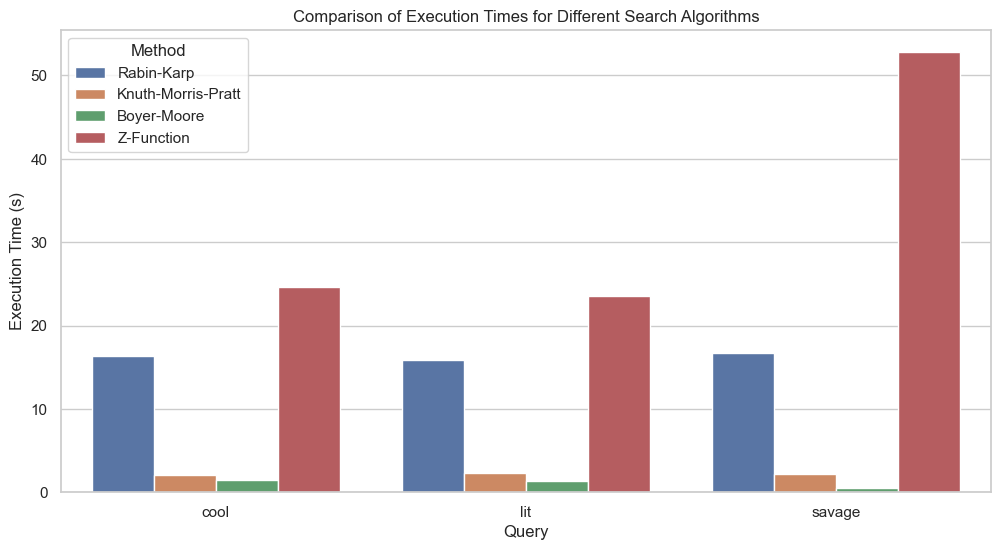

In [ ]:
# Set the aesthetic style of the plots
sns.set_theme(context="notebook", style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Query", y="Execution Time (s)",
            hue="Method", data=performance_df)

# Add titles and labels
plt.title("Comparison of Execution Times for Different Search Algorithms")
plt.xlabel("Query")
plt.ylabel("Execution Time (s)")

# Display the plot
plt.show()